In [1]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
crime_data = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

In [3]:
print(crime_data.head())

       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200     1   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2      Central          155         2     845   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc  ... Status  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO   
1                           BATTERY - SIMPLE ASSAULT  ...     IC   
2          SEX OFFEN

In [4]:
# Print the columns in the dataset
print(crime_data.columns)

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')


In [5]:
# 1. Convert date columns to datetime format
crime_data['Date Rptd'] = pd.to_datetime(crime_data['Date Rptd'])
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])

# 2. Handle missing values
crime_data = crime_data.dropna()

# 3. Convert categorical columns to appropriate data types
crime_data['AREA'] = crime_data['AREA'].astype('category')
crime_data['Part 1-2'] = crime_data['Part 1-2'].astype('category')
crime_data['Crm Cd'] = crime_data['Crm Cd'].astype('category')

# 4. Remove unnecessary columns
crime_data = crime_data.drop(['Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'], axis=1)

# 5. Handle outliers or incorrect values (if applicable)
crime_data = crime_data[(crime_data['Vict Age'] >= 0) & (crime_data['Vict Age'] <= 100)]

# Display the cleaned dataset
print(crime_data.head())

            DR_NO  Date Rptd   DATE OCC  TIME OCC AREA  AREA NAME  \
49068   200613424 2020-08-02 2020-08-02      2030    6  Hollywood   
122954  201904032 2020-01-02 2020-01-01      2135   19    Mission   
363039  210617136 2021-10-08 2021-10-07      1950    6  Hollywood   
371792  210209196 2021-05-08 2021-05-08       230    2    Rampart   
489329  220600626 2022-04-27 2022-04-23      2300    6  Hollywood   

        Rpt Dist No Part 1-2 Crm Cd  \
49068           657        1    761   
122954         1924        1    761   
363039          659        1    121   
371792          279        1    210   
489329          646        1    821   

                                              Crm Cd Desc  ... Premis Cd  \
49068                                     BRANDISH WEAPON  ...     108.0   
122954                                    BRANDISH WEAPON  ...     101.0   
363039                                     RAPE, FORCIBLE  ...     710.0   
371792                                        

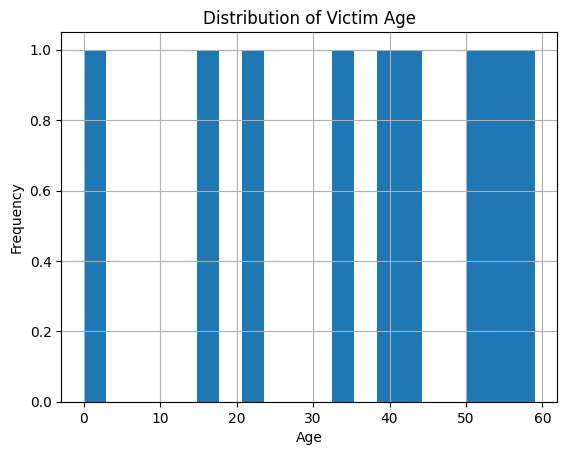

In [6]:
#  univariate analysis  
import matplotlib.pyplot as plt
crime_data['Vict Age'].hist(bins=20)
plt.title('Distribution of Victim Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Research Question 1

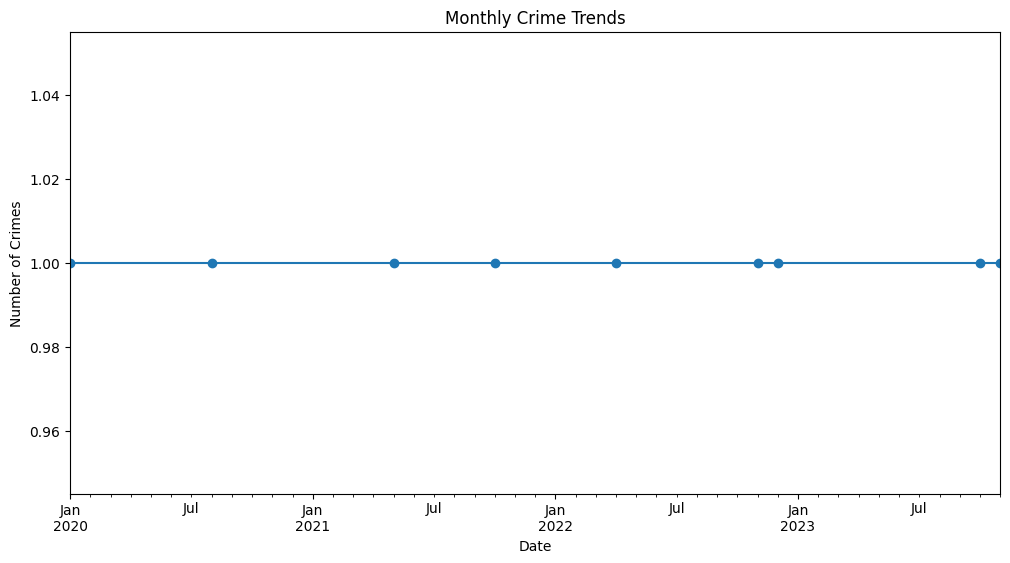

In [7]:
# Convert 'DATE OCC' to datetime
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])

# Extract month and year
crime_data['Month_Year'] = crime_data['DATE OCC'].dt.to_period('M')

# Monthly crime counts
monthly_crime_counts = crime_data['Month_Year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
monthly_crime_counts.plot(marker='o')
plt.title('Monthly Crime Trends')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()

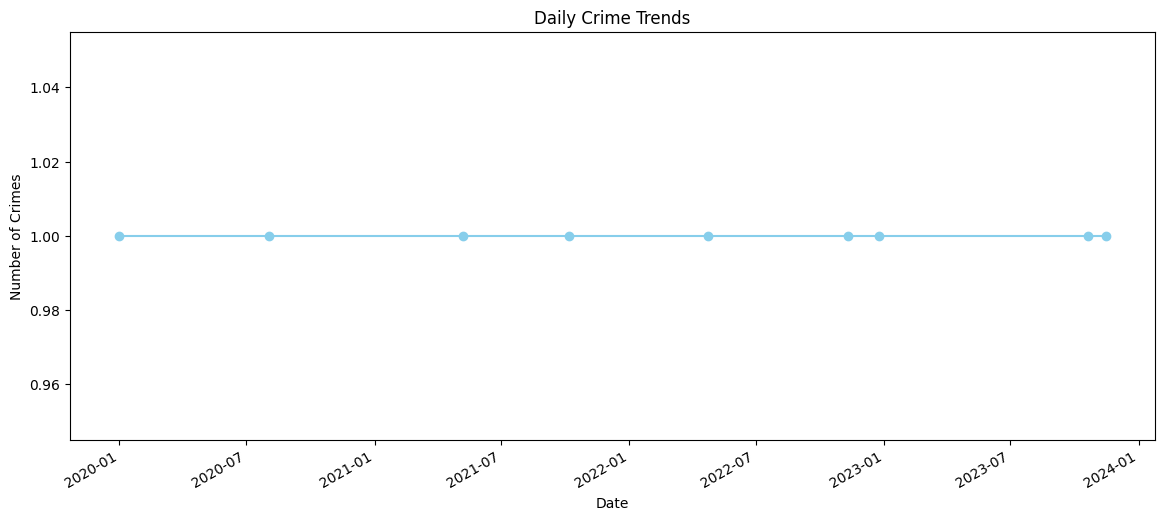

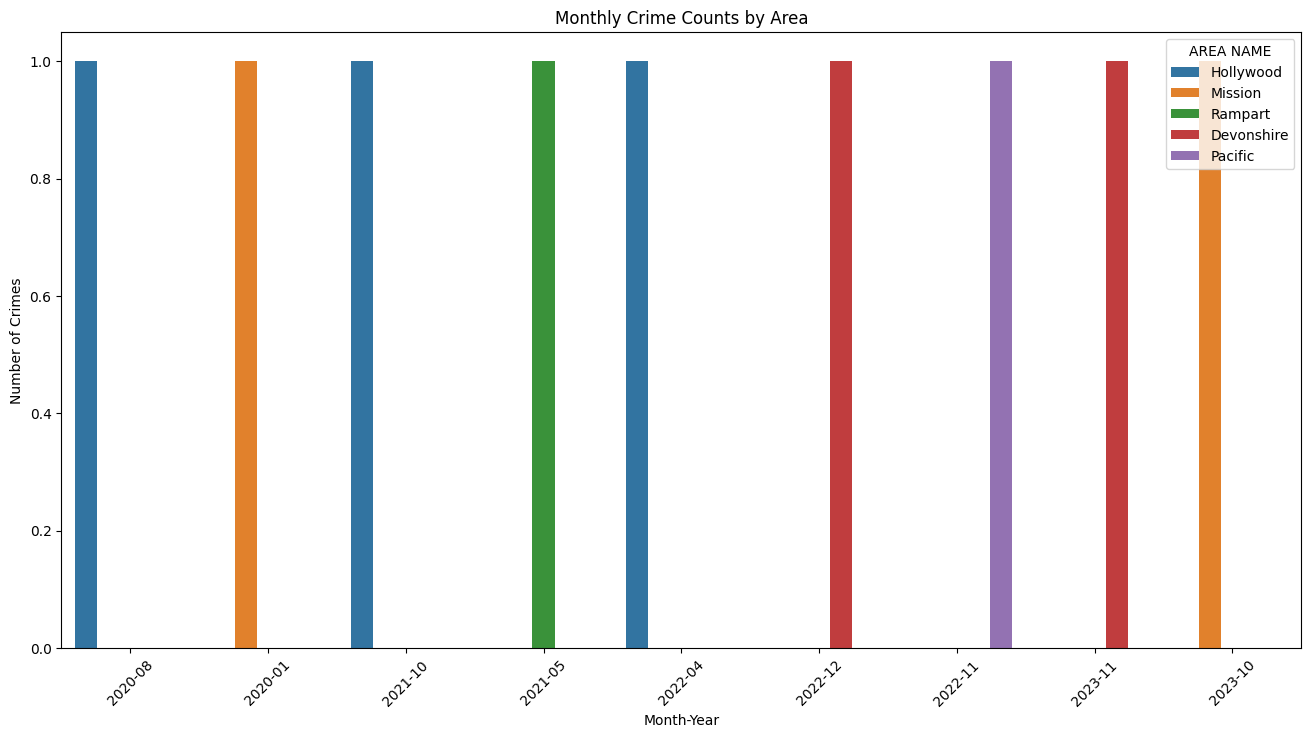

In [8]:
import seaborn as sns

# Daily crime counts
daily_crime_counts = crime_data['DATE OCC'].value_counts().sort_index()

# Plotting daily crime counts
plt.figure(figsize=(14, 6))
daily_crime_counts.plot(marker='o', linestyle='-', color='skyblue')
plt.title('Daily Crime Trends')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()

# Monthly crime counts by area
plt.figure(figsize=(16, 8))
sns.countplot(x='Month_Year', hue='AREA NAME', data=crime_data)
plt.title('Monthly Crime Counts by Area')
plt.xlabel('Month-Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

# Research question 2

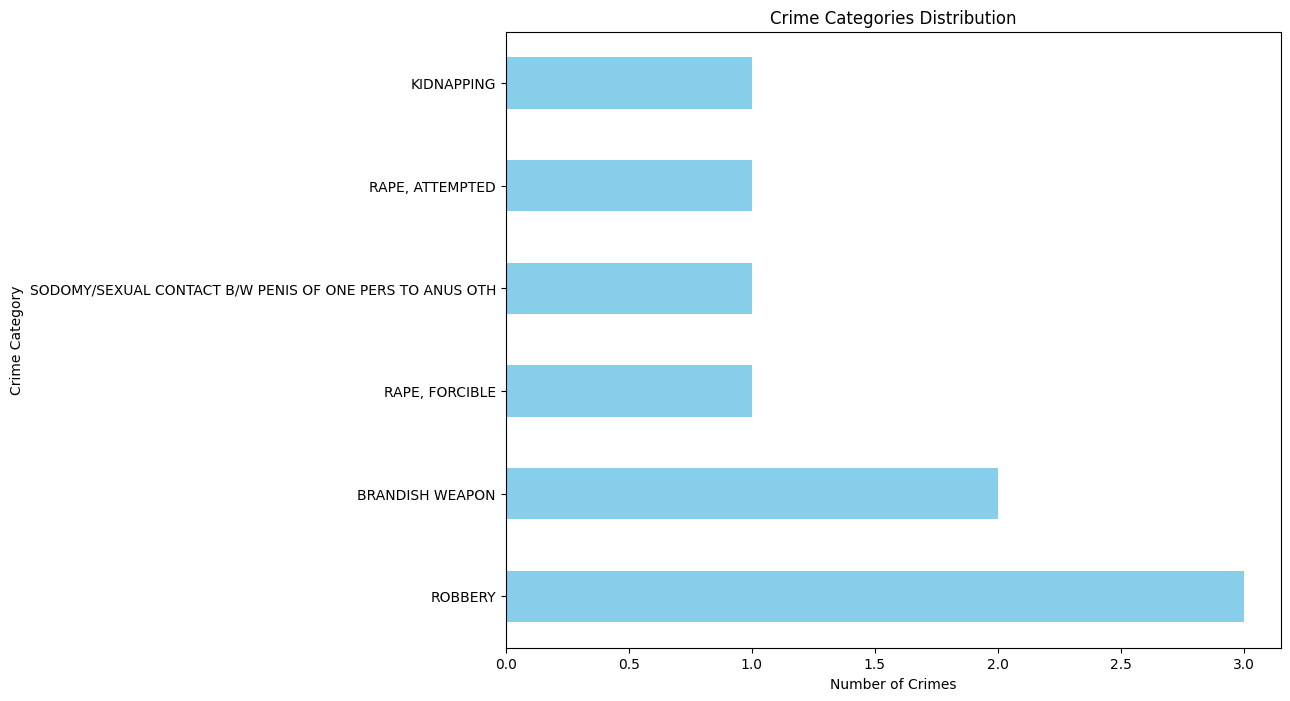

In [9]:
# Categorical plot of crime categories
plt.figure(figsize=(10, 8))
crime_data['Crm Cd Desc'].value_counts().plot(kind='barh', color='skyblue')
plt.title('Crime Categories Distribution')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Category')
plt.show()

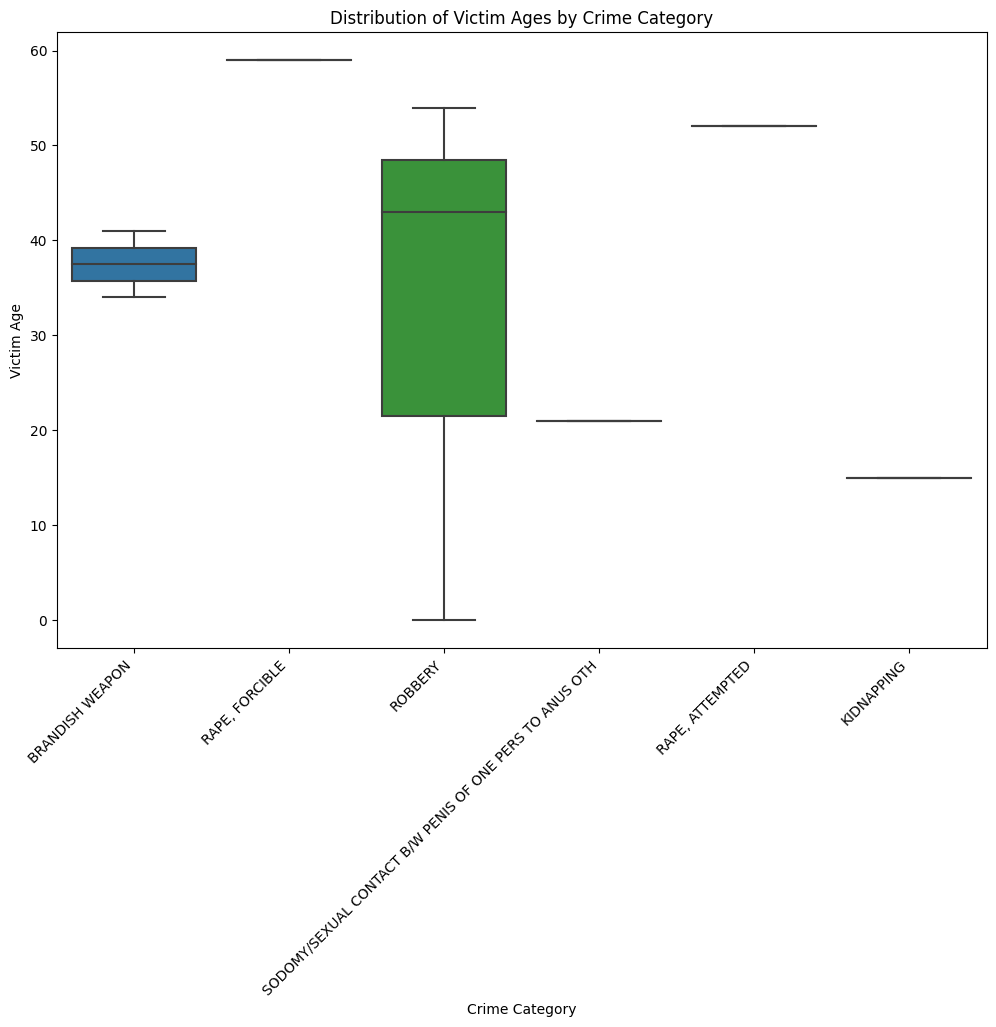

In [10]:
# Boxplot of victim ages by crime category
plt.figure(figsize=(12, 8))
sns.boxplot(x='Crm Cd Desc', y='Vict Age', data=crime_data)
plt.title('Distribution of Victim Ages by Crime Category')
plt.xlabel('Crime Category')
plt.ylabel('Victim Age')
plt.xticks(rotation=45, ha='right')
plt.show()

# Research question 3

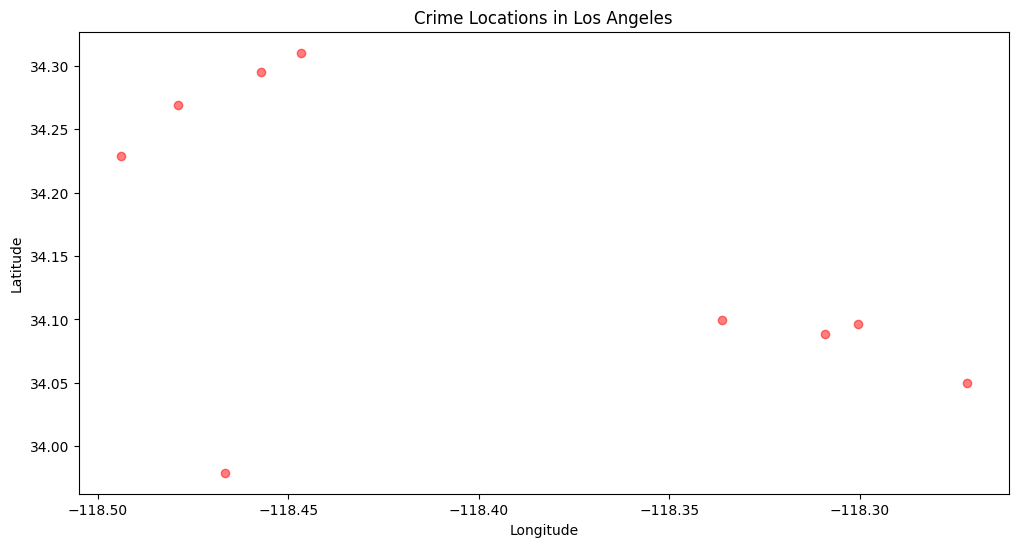

In [11]:
# Scatter plot of crime locations
plt.figure(figsize=(12, 6))
plt.scatter(crime_data['LON'], crime_data['LAT'], alpha=0.5, c='red')
plt.title('Crime Locations in Los Angeles')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

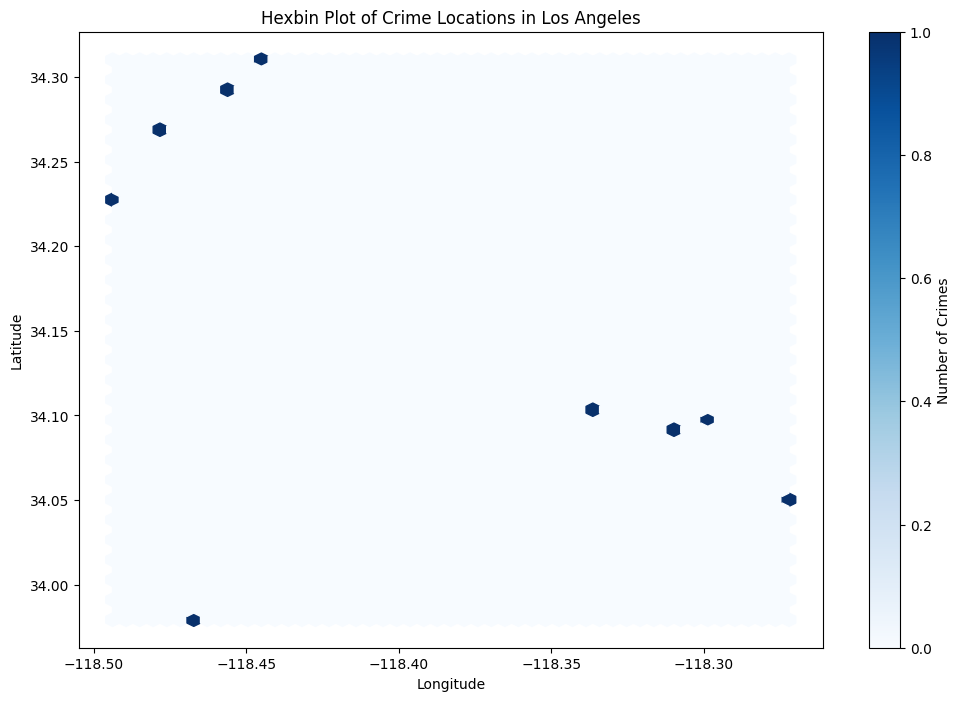

In [12]:
# Hexbin plot of crime locations
plt.figure(figsize=(12, 8))
plt.hexbin(crime_data['LON'], crime_data['LAT'], gridsize=50, cmap='Blues')
plt.title('Hexbin Plot of Crime Locations in Los Angeles')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Number of Crimes')
plt.show()